In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import random
import math
from timeit import default_timer as timer

In [2]:
inputString = '''
1 1 1
1 6 1
2 1 2
3 9 2
3 10 2
4 6 1
5 6 2
7 2 2
8 1 1
8 9 1
9 1 1
9 9 1
9 10 2
10 3 1
10 5 2
'''
dataFromStr = [[int(e) for e in textline.split(' ')] for textline in inputString.strip().split('\n')]

In [3]:
dataFromStr

[[1, 1, 1],
 [1, 6, 1],
 [2, 1, 2],
 [3, 9, 2],
 [3, 10, 2],
 [4, 6, 1],
 [5, 6, 2],
 [7, 2, 2],
 [8, 1, 1],
 [8, 9, 1],
 [9, 1, 1],
 [9, 9, 1],
 [9, 10, 2],
 [10, 3, 1],
 [10, 5, 2]]

In [4]:
E1 = [tuple(row[:-1]) for row in dataFromStr if row[2]==1]
E2 = [tuple(row[:-1]) for row in dataFromStr if row[2]==2]
print(E1)
print(E2)

[(1, 1), (1, 6), (4, 6), (8, 1), (8, 9), (9, 1), (9, 9), (10, 3)]
[(2, 1), (3, 9), (3, 10), (5, 6), (7, 2), (9, 10), (10, 5)]


In [5]:
inputString = '''
1 1 
1 6 
2 1 
3 9 
3 10
4 6 
5 6 
7 2 
8 1 
8 9 
9 1 
9 9 
9 10 
10 3 
10 5 
'''
dataFromStrNoClass = [[int(e) for e in textline.strip().split(' ')] for textline in inputString.strip().split('\n')]

In [6]:
dataFromStrNoClass

[[1, 1],
 [1, 6],
 [2, 1],
 [3, 9],
 [3, 10],
 [4, 6],
 [5, 6],
 [7, 2],
 [8, 1],
 [8, 9],
 [9, 1],
 [9, 9],
 [9, 10],
 [10, 3],
 [10, 5]]

In [7]:
df = pd.DataFrame(
    data=dataFromStr,
    columns=['x','y','label']
)

In [8]:
df

,x,y,label
0,1,1,1
1,1,6,1
2,2,1,2
3,3,9,2
4,3,10,2
5,4,6,1
6,5,6,2
7,7,2,2
8,8,1,1
9,8,9,1


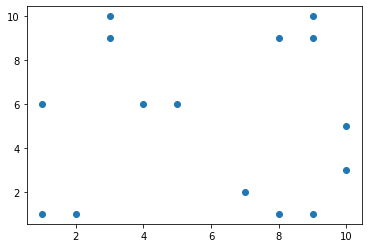

In [25]:
fig, ax = plt.subplots(1,1)

# ax.scatter(x=df['x'], y=df['y'])

ax.scatter(df['x'], df['y'])


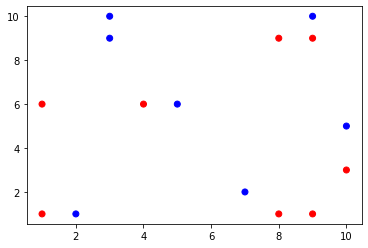

In [23]:
fig, ax = plt.subplots(1,1)

colors = {1: 'red', 2: 'blue'}

# ax.scatter(x=df['x'], y=df['y'])

ax.scatter(df['x'], df['y'], c=df['label'].map(colors))

In [9]:
def get_initial_means(array, method='rand'):
    """
    Picks k random points from the 2D array 
    (without replacement) to use as initial 
    cluster means

    params:
    array = numpy.ndarray[numpy.ndarray[float]] - m x n | datapoints x features

    k = int

    returns:
    initial_means = numpy.ndarray[numpy.ndarray[float]]
    """
    # TODO: finish this function
    ret = random.sample(array, k=3)
    return np.array(ret)

In [10]:
initMeans = get_initial_means(dataFromStrNoClass)
initMeans

array([[8, 1],
       [9, 9],
       [7, 2]])

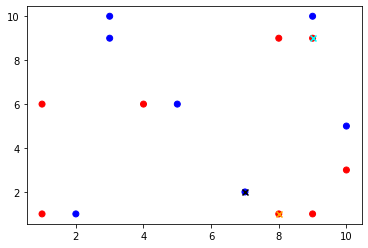

In [11]:
fig, ax = plt.subplots(1,1)

colors = {1: 'red', 2: 'blue'}

ax.scatter(df['x'], df['y'], c=df['label'].map(colors))
ax.scatter([initMeans[0][0]], [initMeans[0][1]], marker='x',c='orange')
ax.scatter([initMeans[1][0]], [initMeans[1][1]], marker='x',c='cyan')
ax.scatter([initMeans[2][0]], [initMeans[2][1]], marker='x',c='black')

In [18]:
def k_means_step(X, k, means, DEBUG=False):
    """
    A single update/step of the K-means algorithm
    Based on a input X and current mean estimates,
    predict clusters for each of the examples in X and 
    calculate new means. 
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n | pixels x features (already flattened)
        (15,2)
    k = int
    means = numpy.ndarray[numpy.ndarray[float]] - k x n
        (2,2)

    returns:
    (new_means, clusters)
    new_means = numpy.ndarray[numpy.ndarray[float]] - k x n
    clusters = numpy.ndarray[int] - m sized vector
    """
    dataset = X

    if DEBUG:
        print('====== BEGIN K_M STEP ======')
        print('Step 2: Map points to closest init-cluster-mean by Euclidean Distance')
        print(f'Dists from each point to each Init-Centroid in the format of [point] -> (cluster label, dist to that cluster\'s centroid):')
    
    pointToCluster = {} # x,y point example from dataset -> cluster label
    for point in dataset:
        dists = [( round(np.linalg.norm(point-means[i]),3), i) for i in range(k)]
        
        if DEBUG:
            print(f'{point} : {[(l,d) for d,l in dists]}')
        
        bestDist = min(dists)
        closestClusterLabel = bestDist[1]
        pointToCluster[tuple(point.tolist())] = closestClusterLabel
    
    if DEBUG:
        print('\nPoint to Cluster Assignments:')
        print(pointToCluster)
        print('-'*15)
        print('Step 3: Recalibrate cluster centers')
        print('Cluster Means')
    
    clusterMeans = {} # clusterLabel -> [x_mean, y_mean]
    clusterLabels = set(pointToCluster.values())
    for clusterLabel in clusterLabels:
        clusterPoints = [point for point,cluster in pointToCluster.items() if cluster==clusterLabel]
        clusterMean = np.mean(clusterPoints, axis=0)
        clusterMeans[clusterLabel] = clusterMean
        if DEBUG:
            print('\nCluster', clusterLabel)
            print('Points', clusterPoints)
            print('XY Mean', clusterMean)
     
    if DEBUG:
        print('\nPoint to Cluster Assignments After Min-MH-Distance Reassignment:')
        print(pointToCluster)
    
    curClusters = [
        [point for point,label in pointToCluster.items() if label==clusterLabel]
        for clusterLabel in clusterLabels
    ]
    
    return list(clusterMeans.values()), curClusters

In [19]:
k_means_step(np.array(dataFromStrNoClass), k=3, means=initMeans, DEBUG=True)

====== BEGIN K_M STEP ======
Step 2: Map points to closest init-cluster-mean by Euclidean Distance
Dists from each point to each Init-Centroid in the format of [point] -> (cluster label, dist to that cluster's centroid):
[1 1] : [(0, 7.0), (1, 11.314), (2, 6.083)]
[1 6] : [(0, 8.602), (1, 8.544), (2, 7.211)]
[2 1] : [(0, 6.0), (1, 10.63), (2, 5.099)]
[3 9] : [(0, 9.434), (1, 6.0), (2, 8.062)]
[ 3 10] : [(0, 10.296), (1, 6.083), (2, 8.944)]
[4 6] : [(0, 6.403), (1, 5.831), (2, 5.0)]
[5 6] : [(0, 5.831), (1, 5.0), (2, 4.472)]
[7 2] : [(0, 1.414), (1, 7.28), (2, 0.0)]
[8 1] : [(0, 0.0), (1, 8.062), (2, 1.414)]
[8 9] : [(0, 8.0), (1, 1.0), (2, 7.071)]
[9 1] : [(0, 1.0), (1, 8.0), (2, 2.236)]
[9 9] : [(0, 8.062), (1, 0.0), (2, 7.28)]
[ 9 10] : [(0, 9.055), (1, 1.0), (2, 8.246)]
[10  3] : [(0, 2.828), (1, 6.083), (2, 3.162)]
[10  5] : [(0, 4.472), (1, 4.123), (2, 4.243)]

Point to Cluster Assignments:
{(1, 1): 2, (1, 6): 2, (2, 1): 2, (3, 9): 1, (3, 10): 1, (4, 6): 2, (5, 6): 2, (7, 2): 2, (

([array([9.        , 1.66666667]),
  array([7.        , 8.66666667]),
  array([3.33333333, 3.66666667])],
 [[(8, 1), (9, 1), (10, 3)],
  [(3, 9), (3, 10), (8, 9), (9, 9), (9, 10), (10, 5)],
  [(1, 1), (1, 6), (2, 1), (4, 6), (5, 6), (7, 2)]])

In [20]:
def k_means_segment(dataset, k=2, initial_means=None, DEBUG=False):
    if initial_means is None:
        print('creating initial means...')
        initial_means = get_initial_means(dataset, k)
    
    if DEBUG:
        print('init means')
        print(initial_means)
        print('-'*15)

    print('1st call to k_means')
    curMeans, curClusters = k_means_step(dataset, k, initial_means, DEBUG=True)
    vizIter(curMeans, curClusters)
    if DEBUG:
        print('curMeans')
        print(curMeans)
        print('curClusters')
        print(curClusters)
        print()
    
    iterStyle = 2
    if iterStyle == 2:
        print('2nd call to k_means')
        curMeans, curClusters = k_means_step(dataset, k, curMeans, DEBUG=True)
        vizIter(curMeans, curClusters)
        prevClusters = tuple([tuple(c) for c in curClusters])
    else:
        prevClusters = tuple([tuple(c) for c in curClusters])
        for i in range(10):
            curMeans, curClusters = k_means_step(dataset, k, curMeans, DEBUG=True)
            vizIter(curMeans, curClusters)
            if prevClusters == tuple([tuple(c) for c in curClusters]):
                break
            prevClusters = tuple([tuple(c) for c in curClusters])
    
    if DEBUG:
        print('====== END K_M STEPPING ======')
        print('curMeans')
        print(curMeans)
        print('curClusters')
        print(curClusters)
    
    return curMeans, prevClusters

In [22]:
def vizIter(curMeans, clusterData):
    fig, ax = plt.subplots(1,1)
    colors = ['red','blue','green']
    for i,clusterXYs in enumerate(clusterData):
        xValues_e1 = [xy[0] for xy in clusterXYs if xy in E1]
        yValues_e1 = [xy[1] for xy in clusterXYs if xy in E1]
        ax.scatter(xValues_e1, yValues_e1,
                   marker='*', c=colors[i], label=f'Cluster {i}, E1')
        
        xValues_e2 = [xy[0] for xy in clusterXYs if xy in E2]
        yValues_e2 = [xy[1] for xy in clusterXYs if xy in E2]
        ax.scatter(xValues_e2, yValues_e2,
                   marker='+', c=colors[i], label=f'Cluster {i}, E2')
        
        thisMean = curMeans[i]
        ax.scatter([thisMean[0]], [thisMean[1]], marker='x', c=colors[i], label=f'Cluster {i} Centroid')
#     fig.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
    return

In [23]:
def vizInit(datapoints, initMeans):
    if type(initMeans) != list:
        initMeans = initMeans.tolist()
    
    datapoints = [d for d in datapoints if d not in initMeans]
    
    fig, ax = plt.subplots(1,1)
    
    xValues = [xy[0] for xy in datapoints]
    yValues = [xy[1] for xy in datapoints]
    ax.scatter(xValues, yValues)
    
    mean_xs = [xy[0] for xy in initMeans]
    mean_ys = [xy[1] for xy in initMeans]
    ax.scatter(mean_xs, mean_ys, c='red', label='Cluster Centroid')
    
    fig.legend()
    fig.suptitle('Initial Centroids of Clusters')
    plt.tight_layout()
    plt.show()
    return

In [348]:
initMeans_LucioFGC = [
    (2, 1),
    (7, 2),
    (9, 10)
]
initMeans = get_initial_means(dataFromStrNoClass)

In [402]:
initMeans = [
    [ 1,  1],
    [ 3,  9],
    [ 9, 10]
]
print(initMeans)

[[1, 1], [3, 9], [9, 10]]


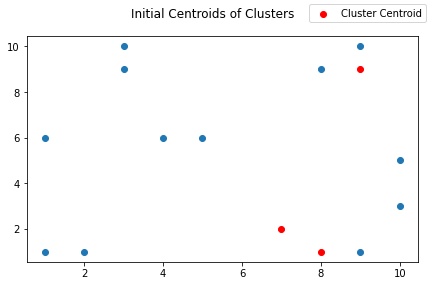

In [24]:
vizInit(dataFromStrNoClass, initMeans)

init means
[[8 1]
 [9 9]
 [7 2]]
---------------
1st call to k_means
====== BEGIN K_M STEP ======
Step 2: Map points to closest init-cluster-mean by Euclidean Distance
Dists from each point to each Init-Centroid in the format of [point] -> (cluster label, dist to that cluster's centroid):
[1 1] : [(0, 7.0), (1, 11.314), (2, 6.083)]
[1 6] : [(0, 8.602), (1, 8.544), (2, 7.211)]
[2 1] : [(0, 6.0), (1, 10.63), (2, 5.099)]
[3 9] : [(0, 9.434), (1, 6.0), (2, 8.062)]
[ 3 10] : [(0, 10.296), (1, 6.083), (2, 8.944)]
[4 6] : [(0, 6.403), (1, 5.831), (2, 5.0)]
[5 6] : [(0, 5.831), (1, 5.0), (2, 4.472)]
[7 2] : [(0, 1.414), (1, 7.28), (2, 0.0)]
[8 1] : [(0, 0.0), (1, 8.062), (2, 1.414)]
[8 9] : [(0, 8.0), (1, 1.0), (2, 7.071)]
[9 1] : [(0, 1.0), (1, 8.0), (2, 2.236)]
[9 9] : [(0, 8.062), (1, 0.0), (2, 7.28)]
[ 9 10] : [(0, 9.055), (1, 1.0), (2, 8.246)]
[10  3] : [(0, 2.828), (1, 6.083), (2, 3.162)]
[10  5] : [(0, 4.472), (1, 4.123), (2, 4.243)]

Point to Cluster Assignments:
{(1, 1): 2, (1, 6): 2,

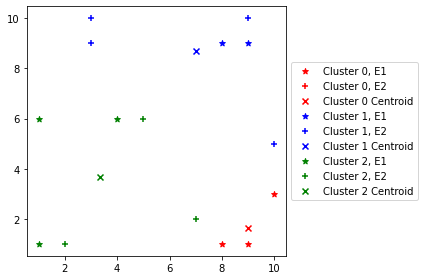

curMeans
[array([9.        , 1.66666667]), array([7.        , 8.66666667]), array([3.33333333, 3.66666667])]
curClusters
[[(8, 1), (9, 1), (10, 3)], [(3, 9), (3, 10), (8, 9), (9, 9), (9, 10), (10, 5)], [(1, 1), (1, 6), (2, 1), (4, 6), (5, 6), (7, 2)]]

2nd call to k_means
====== BEGIN K_M STEP ======
Step 2: Map points to closest init-cluster-mean by Euclidean Distance
Dists from each point to each Init-Centroid in the format of [point] -> (cluster label, dist to that cluster's centroid):
[1 1] : [(0, 8.028), (1, 9.735), (2, 3.543)]
[1 6] : [(0, 9.098), (1, 6.566), (2, 3.3)]
[2 1] : [(0, 7.032), (1, 9.153), (2, 2.981)]
[3 9] : [(0, 9.475), (1, 4.014), (2, 5.344)]
[ 3 10] : [(0, 10.269), (1, 4.216), (2, 6.342)]
[4 6] : [(0, 6.616), (1, 4.014), (2, 2.427)]
[5 6] : [(0, 5.897), (1, 3.333), (2, 2.867)]
[7 2] : [(0, 2.028), (1, 6.667), (2, 4.028)]
[8 1] : [(0, 1.202), (1, 7.732), (2, 5.375)]
[8 9] : [(0, 7.401), (1, 1.054), (2, 7.087)]
[9 1] : [(0, 0.667), (1, 7.923), (2, 6.263)]
[9 9] : [(

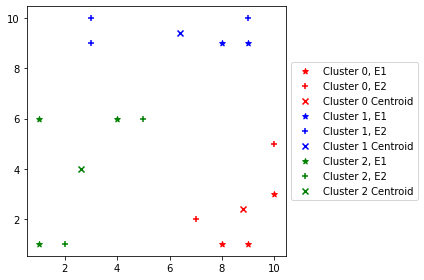

====== END K_M STEPPING ======
curMeans
[array([8.8, 2.4]), array([6.4, 9.4]), array([2.6, 4. ])]
curClusters
[[(7, 2), (8, 1), (9, 1), (10, 3), (10, 5)], [(3, 9), (3, 10), (8, 9), (9, 9), (9, 10)], [(1, 1), (1, 6), (2, 1), (4, 6), (5, 6)]]


In [25]:
startTime = timer()
k_means_segment(np.array(dataFromStrNoClass),
                k=3,
                initial_means=initMeans,
                DEBUG=True
)
stopTime = timer()

In [26]:
print(stopTime - startTime, 'seconds to perform 2 iterations of K-Means Clustering with Mahalanobis Distance')

0.18699119999973846 seconds to perform 2 iterations of K-Means Clustering with Mahalanobis Distance
